In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

import sys
src_path = os.path.abspath(os.path.join(os.getcwd(), '..', 'src/saffine'))
print("Adding to sys.path:", src_path)
sys.path.append(src_path)

from saffine import multi_detrending as md

Adding to sys.path: /Users/au324704/Desktop/fanfic_sentiment/src/saffine


In [15]:

## ---- Hurst exponent ---- ##

def integrate(x: list[float]) -> np.matrix:
    return np.mat(np.cumsum(x) - np.mean(x))


# from fabula-pipeline
def get_hurst(arc: list[float]):
    arc = [float(x) for x in arc]

    y = integrate(arc) 
    #y = np.mat(arc)

    uneven = y.shape[1] % 2
    if uneven:
        y = y[0, :-1]

    step_size = 1
    q = 3
    order = 1
    xy = md.multi_detrending(y, step_size, q, order)

    x = np.squeeze(np.asarray(xy[0]))
    y = np.squeeze(np.asarray(xy[1]))

    hurst = round(np.polyfit(x, y, 1)[0], 2)
    return hurst

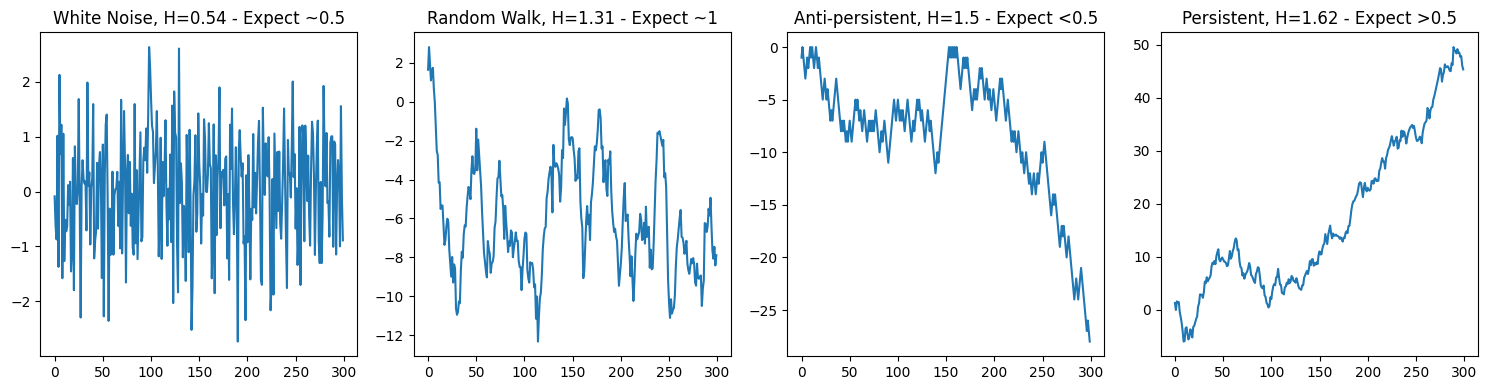

In [16]:
length = 300

# white noise
a = np.random.normal(0, 1, length)

# persistent (random walk)
b = np.cumsum(np.random.normal(0, 1, length))

# anti-persistent
c = np.random.choice([-1, 1], size=length)
c = np.cumsum((-1) ** np.arange(length) * c)

# persistent
d = np.cumsum(np.random.normal(0, 1, length)) + np.arange(length) * 0.1  # adding a trend


# plot all
plt.figure(figsize=(15, 4))
plt.subplot(1, 4, 1)
plt.plot(a, label=f'White Noise')
plt.title(f'White Noise, H={get_hurst(a)} - Expect ~0.5')
plt.subplot(1, 4, 2)
plt.plot(b, label='Random Walk')
plt.title(f'Random Walk, H={get_hurst(b)} - Expect ~1')
plt.subplot(1, 4, 3)
plt.plot(c, label='Anti-persistent')
plt.title(f'Anti-persistent, H={get_hurst(c)} - Expect <0.5')
plt.subplot(1, 4, 4)
plt.plot(d, label='Persistent')
plt.title(f'Persistent, H={get_hurst(d)} - Expect >0.5')
plt.tight_layout()
plt.show()


